<a href="https://colab.research.google.com/github/EduDN/FakeNews_Detector/blob/main/Webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# manipulación de datos de distintos formatos.
import pandas as pd
# separar los datos en un conjunto de entrenamiento, que se utiliza para entrenar el modelo, y un conjunto de prueba.
from sklearn.model_selection import train_test_split
# TfidfVectorizer es una técnica para convertir texto en representaciones numéricas que pueden ser utilizadas por algoritmos de aprendizaje automático.
from sklearn.feature_extraction.text import TfidfVectorizer
# representar recuentos, como el número de veces que una palabra aparece en un documento
from sklearn.naive_bayes import MultinomialNB

TfidfVectorizer se utiliza para convertir texto en características numéricas, mientras que MultinomialNB se utiliza como un clasificador después de que los datos ya han sido transformados

In [2]:
# nubre de palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
##########################################################################
# Construir el DataFrame, conjuntos de entrenamiento y prueba.

# Construir el DataFrame a partir de un archivo CSV
df = pd.read_csv("/content/DATASET_NEWS.csv", encoding='latin1', index_col=0)

In [14]:
# Crear una serie para almacenar las etiquetas (labels)
y = df.label

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.05, random_state=53)


In [15]:
#########################################################################
# TfidfVectorizer para la clasificación de texto

# Inicializar un objeto TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Ajustar y transformar los datos de entrenamiento
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transformar los datos de prueba
tfidf_test = tfidf_vectorizer.transform(X_test)

In [16]:
##########################################################################
# Inspección de los vectores

# Convertir la matriz tfidf_train a un DataFrame para inspección opcional
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names_out())

In [17]:
############################################################################
# Entrenando el modelo "Fake News"

# Instanciar un clasificador Naive Bayes multinomial
nb_classifier = MultinomialNB(alpha=0.1)

# Entrenar el clasificador con los datos de entrenamiento
nb_classifier.fit(tfidf_train, y_train)

MultinomialNB(alpha=0.1)

In [18]:
###############################################################################
# Inspección del modelo

# Obtener las etiquetas de clase
class_labels = nb_classifier.classes_

# Extraer las características (palabras únicas en el vocabulario de todos los artículos)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Combinar los nombres de las características con los coeficientes y ordenar por peso
feat_with_weights = sorted(zip(nb_classifier.feature_log_prob_[0], feature_names))

# Imprimir la primera etiqueta de clase y las 30 primeras características (palabras más asociadas con FALSO)
print(class_labels[0], feat_with_weights[0:30])

# Imprimir la segunda etiqueta de clase y las 30 últimas características (palabras más asociadas con REAL)
print(class_labels[1], feat_with_weights[-30:])

FAKE [(-11.570786874185124, '001'), (-11.570786874185124, '0036'), (-11.570786874185124, '0041'), (-11.570786874185124, '01'), (-11.570786874185124, '0109'), (-11.570786874185124, '02'), (-11.570786874185124, '024'), (-11.570786874185124, '039'), (-11.570786874185124, '050'), (-11.570786874185124, '051'), (-11.570786874185124, '058'), (-11.570786874185124, '0603'), (-11.570786874185124, '0613'), (-11.570786874185124, '0617'), (-11.570786874185124, '0621'), (-11.570786874185124, '0623'), (-11.570786874185124, '0632'), (-11.570786874185124, '0642'), (-11.570786874185124, '0649'), (-11.570786874185124, '0658'), (-11.570786874185124, '07'), (-11.570786874185124, '0700'), (-11.570786874185124, '0701'), (-11.570786874185124, '0703'), (-11.570786874185124, '0716'), (-11.570786874185124, '0724'), (-11.570786874185124, '0735'), (-11.570786874185124, '0745'), (-11.570786874185124, '0747'), (-11.570786874185124, '08')]
REAL [(-6.764081409474561, 'flynn'), (-6.750662733769191, 'care'), (-6.7423517

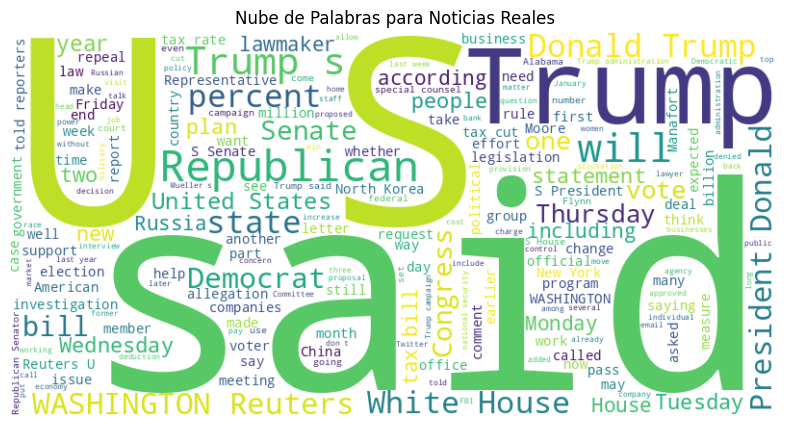

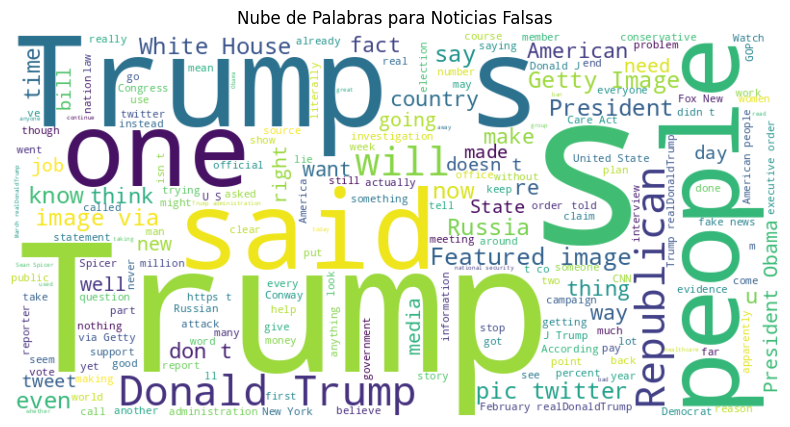

In [19]:
# Definir una función para generar nubes de palabras
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Extraer textos "Reales" y "Falsos"
real_text = ' '.join(df[df['label'] == 'REAL']['text'])
fake_text = ' '.join(df[df['label'] == 'FAKE']['text'])

# Generar nubes de palabras
generate_wordcloud(real_text, 'Nube de Palabras para Noticias Reales')
generate_wordcloud(fake_text, 'Nube de Palabras para Noticias Falsas')


In [20]:
##########################################################################
# Pedir al usuario que ingrese el título y contenido de la noticia
titulo = input("Ingrese el título de la noticia: ")
contenido = input("Ingrese el contenido de la noticia: ")

# Preprocesar el texto de la noticia
texto_noticia = [titulo + " " + contenido]
tfidf_noticia = tfidf_vectorizer.transform(texto_noticia)

# Predecir si la noticia es falsa o no
prediccion = nb_classifier.predict(tfidf_noticia)

# Obtener las probabilidades
probabilidades = nb_classifier.predict_proba(tfidf_noticia)

# Porcentaje de probabilidad de que sea falsa
porcentaje_falsa = probabilidades[0][0] * 100

# Porcentaje de probabilidad de que sea real
porcentaje_real = probabilidades[0][1] * 100

# Imprimir el resultado
print(f"La noticia tiene un {porcentaje_falsa:.2f}% de probabilidad de ser falsa.")
print(f"La noticia tiene un {porcentaje_real:.2f}% de probabilidad de ser real.")

Ingrese el título de la noticia: Historic Canine Candidate: Dog Set to Become President in 2024 with Trump as Secretary of State
Ingrese el contenido de la noticia: In an unprecedented turn of events, the political landscape of the United States is about to witness a canine revolution. Meet Max, the charismatic Golden Retriever, who has captured the hearts of millions and is now poised to become the next President of the United States in 2024.  Max's extraordinary journey from the humble beginnings of a rescue shelter to the highest office in the land is nothing short of remarkable. Known for his boundless energy, infectious charm, and unwavering loyalty, Max has won over a diverse coalition of supporters from all walks of life.  The decision to run Max for president was not made lightly. A coalition of forward-thinking political activists, led by a group known as "Paws for Progress," saw in Max the embodiment of unity, compassion, and a fresh perspective sorely needed in American poli